In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("Electricity Energy Demand & Deficit by State.csv", skiprows = [0], header = 1)

In [3]:
df1.shape

(467, 4)

In [19]:
df1.sort_values(['State', "YearValue"], inplace = True)

In [20]:
df1['difference' ]  = df1['EnergyRequirement_MU'] - df1['EnergyAvailability_MU']

In [21]:
states = df1['State'].unique()

In [22]:
dct1 =[]

for state in states:
    data  = df1[df1['State'] == state]
    x = np.array(data['difference'].ewm(com = 0.3).mean())[-1] #  com of 0.3
    #print(state, x)
    dct1.append((x, state))

In [23]:
dct1.sort()


[(0.0, 'LAKSHADWEEP'),
 (0.004900161581950243, 'DIU & DAMAN'),
 (0.04102049436937023, 'SIKKIM'),
 (0.18162587424722798, 'DADRA & NAGAR HAVELI'),
 (0.36872513507563887, 'CHANDIGARH'),
 (0.5797014412831653, 'GOA'),
 (0.7164743732178758, 'MADHYA PRADESH'),
 (2.8942742891834614, 'PUDUCHERRY'),
 (4.10465165309713, 'GUJARAT'),
 (5.04160202005809, 'MIZORAM'),
 (5.557831046199439, 'ARUNACHAL PRADESH'),
 (7.363856958336451, 'PUNJAB'),
 (9.395877216014897, 'MANIPUR'),
 (9.921604142895264, 'ODISHA'),
 (10.369157515319307, 'HARYANA'),
 (11.232547220900976, 'DELHI'),
 (17.50816251052107, 'CHHATTISGARH'),
 (18.89142505535147, 'TELANGANA'),
 (21.341584291177636, 'NAGALAND'),
 (23.695017488313496, 'A & N ISLANDS'),
 (24.050006357610915, 'TRIPURA'),
 (32.413249565003994, 'TAMILNADU'),
 (34.5000074749196, 'KARNATAKA'),
 (37.68040931445903, 'MEGHALAYA'),
 (37.83046424818082, 'MAHARASHTRA'),
 (46.58154820162381, 'ANDHRA PRADESH'),
 (63.74595454267, 'KERALA'),
 (77.0024337419161, 'DVC'),
 (92.9587129411205

Text(0, 0.5, 'Diff of Demand and Supply')

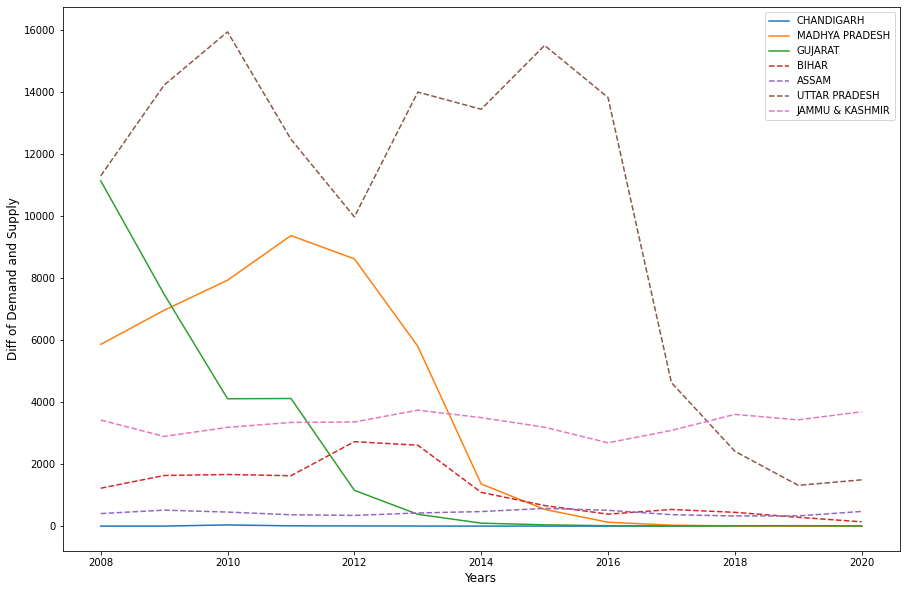

In [38]:
fig = plt.figure(figsize = (15,10) )
for val, state in dct1[2:9]:
    if state in ['DADRA & NAGAR HAVELI','PUDUCHERRY', "SIKKIM", 'GOA']:
        continue
    #print(state)
    data = df1[df1['State'] == state]
    plt.plot(data['YearValue'],data['difference'].ewm(com = 0.3).mean(),'-', label = state)

for val, state in dct1[-4:]:
    #print(state)
    data = df1[df1['State'] == state]
    plt.plot(data['YearValue'],data['difference'].ewm(com = 0.3).mean(),'--', label = state)

plt.legend()
plt.xlabel("Years", fontsize = 12)
plt.ylabel("Diff of Demand and Supply", fontsize = 12)